<a href="https://colab.research.google.com/github/RSP-git-code/Email-Spam-Classifier-using-Gmail-API-and-kaggle-dataset/blob/main/Detecting_Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df =pd.read_csv('/creditcard.csv')

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

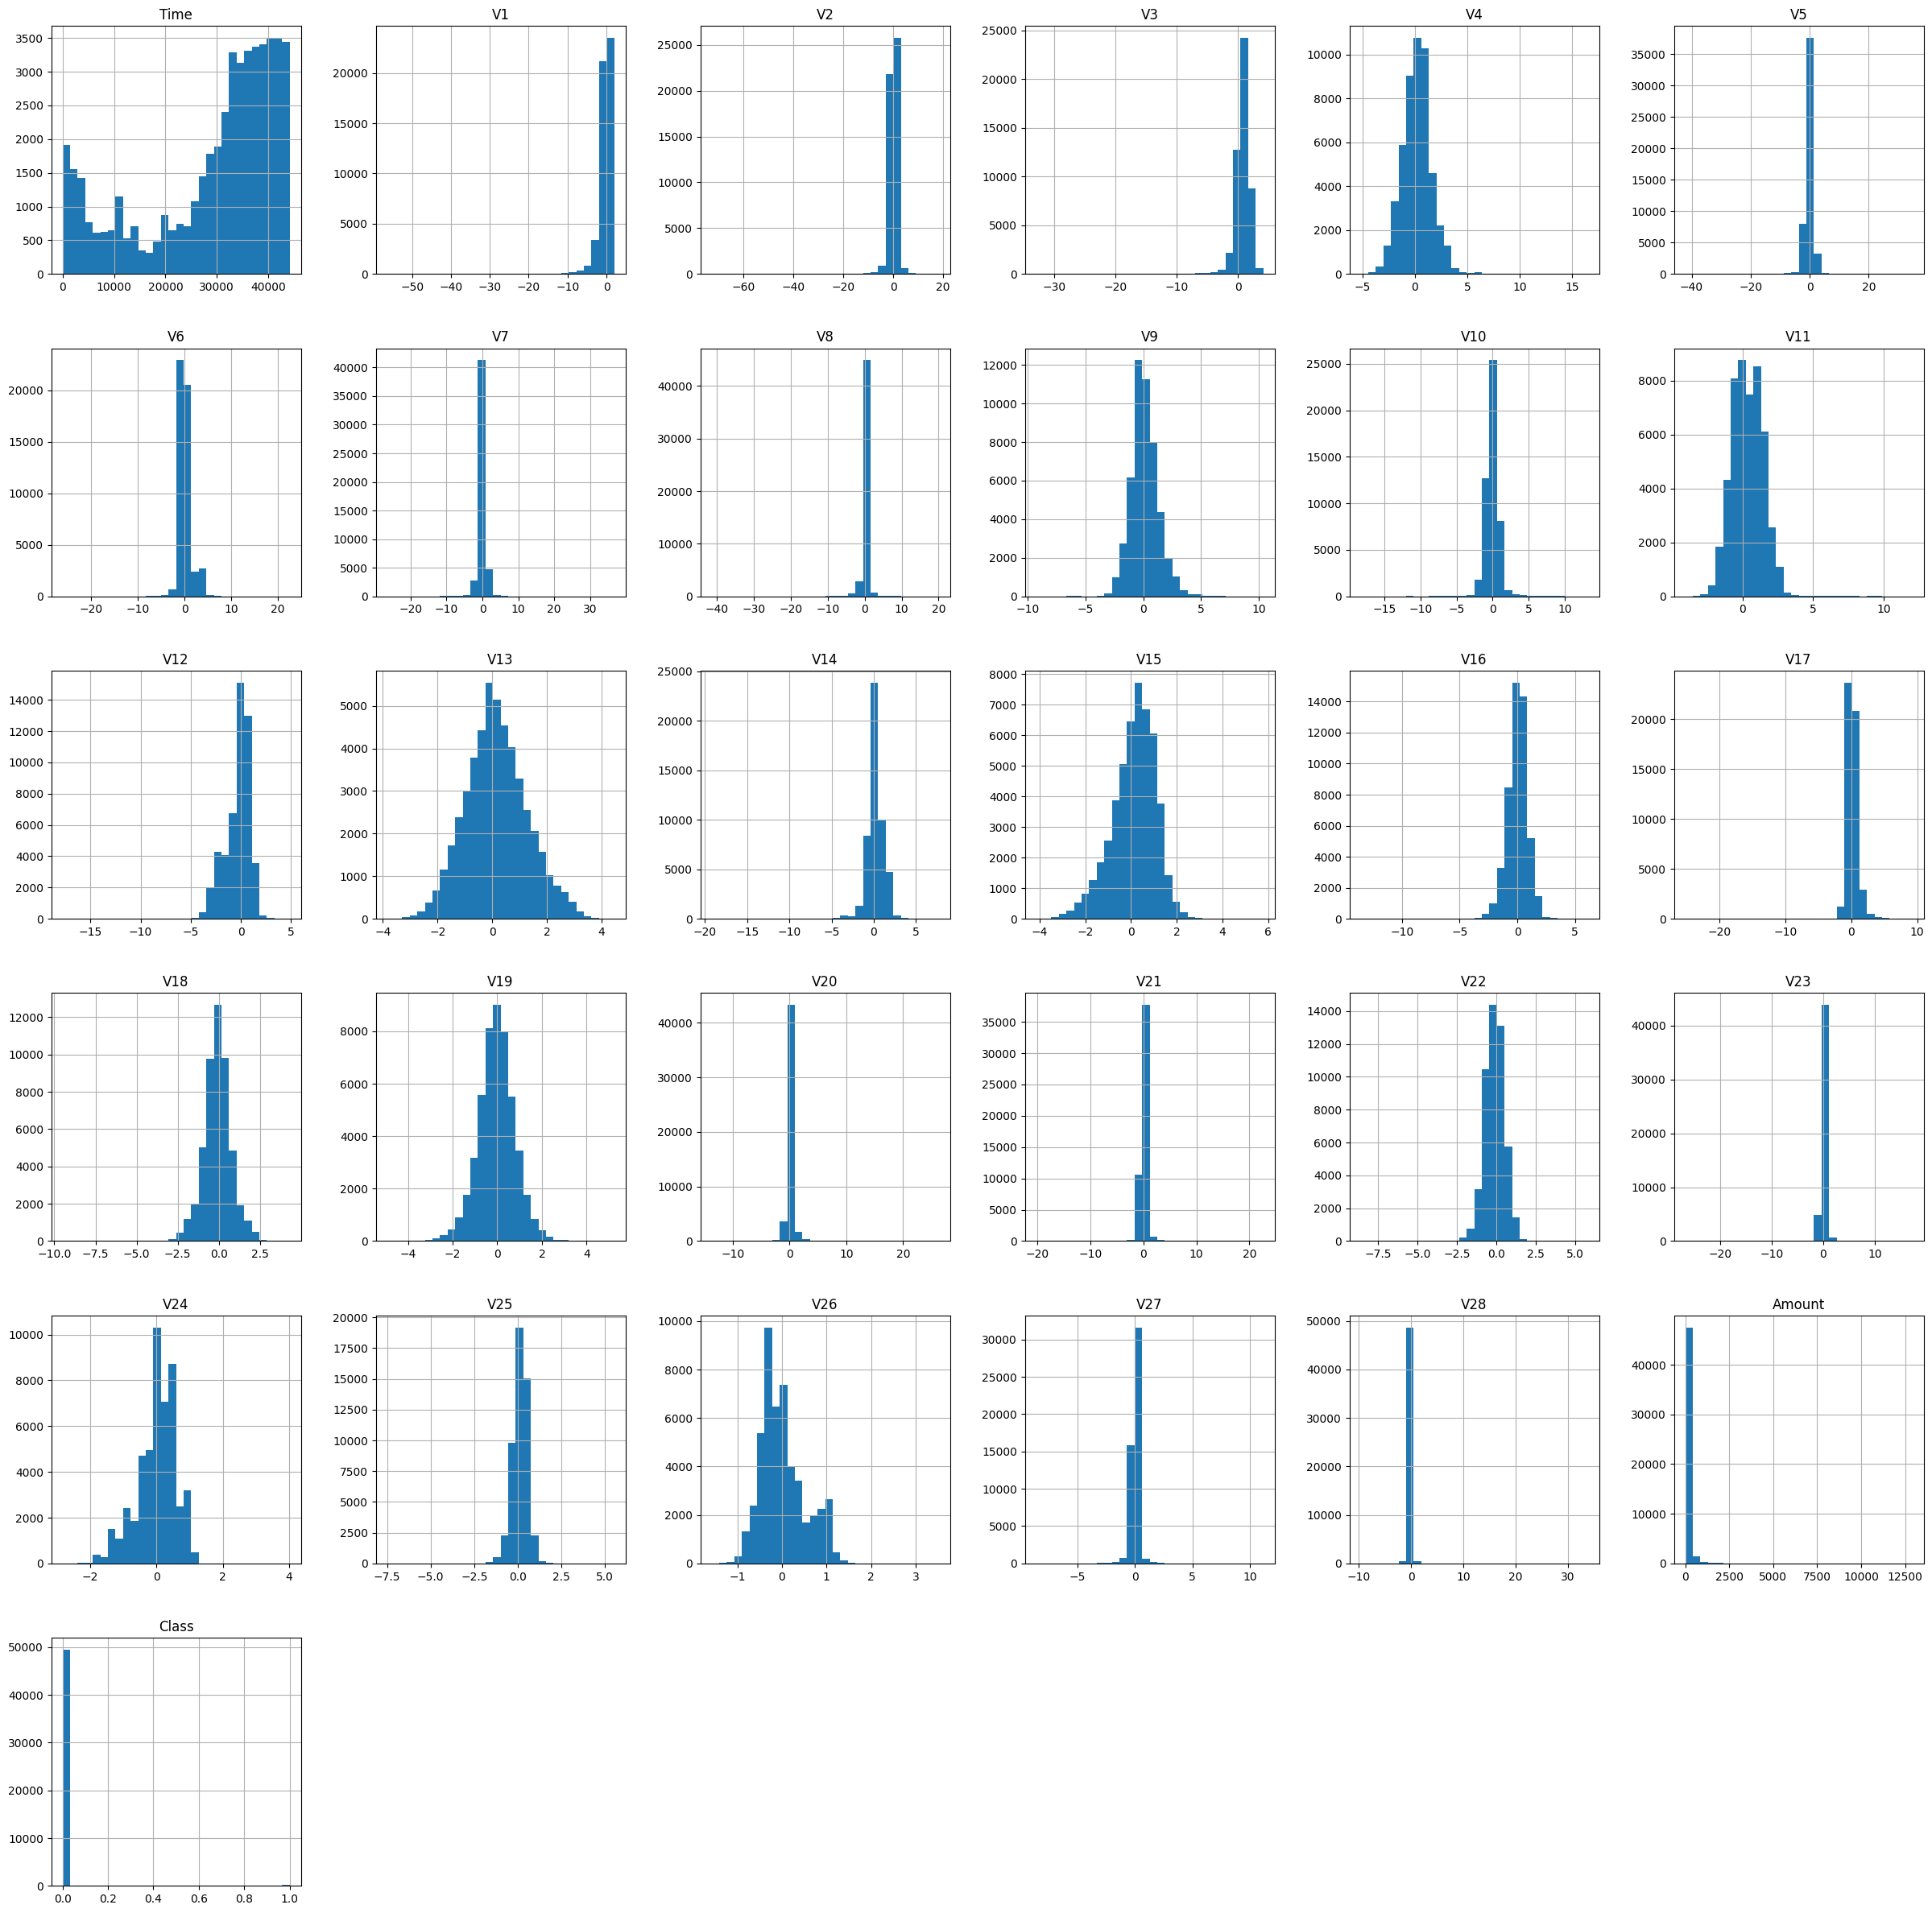

In [ ]:
df.hist(bins=30, figsize=(30, 30))

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,49610.000000,49610.000000,49610.000000,49610.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,...,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000
mean,28803.556239,-0.242569,0.012235,0.693009,0.185186,-0.257016,0.104114,-0.120255,0.053442,0.123490,...,-0.028396,-0.107154,-0.040123,0.007997,0.135954,0.020813,0.004792,0.004533,93.120688,0.002983
std,13097.468525,1.885867,1.630704,1.510559,1.400175,1.413057,1.310705,1.283507,1.224245,1.213441,...,0.736050,0.637733,0.590810,0.594121,0.439067,0.501438,0.388364,0.333225,253.265971,0.054539
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,21734.250000,-0.992845,-0.562967,0.217605,-0.720957,-0.866471,-0.635669,-0.605928,-0.146749,-0.611499,...,-0.231664,-0.529531,-0.179110,-0.322243,-0.127983,-0.330532,-0.063339,-0.006675,7.610000,0.000000
50%,33390.000000,-0.247223,0.079282,0.797007,0.190288,-0.287810,-0.150940,-0.076595,0.058406,0.012150,...,-0.068396,-0.082137,-0.051560,0.061999,0.175766,-0.071826,0.008986,0.022155,25.000000,0.000000
75%,38852.750000,1.155638,0.732318,1.431013,1.067346,0.283513,0.493918,0.424969,0.331555,0.819242,...,0.108082,0.307262,0.078474,0.401392,0.421960,0.300180,0.083910,0.076342,85.000000,0.000000
max,44135.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df =new_df.dropna()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.610286,0.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.288280,0.0
2,0.000023,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.569841,0.0
3,0.000023,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.272774,0.0
4,0.000045,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.581341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49604,0.999955,-1.623757,-1.486672,3.191250,-0.613841,-1.316739,0.585336,-0.005224,0.389628,2.427135,...,0.305795,0.903998,0.229926,0.383144,0.588491,-0.383920,-0.108623,-0.118653,2.865486,0.0
49605,0.999955,-1.211298,-0.450385,1.440502,0.354908,-0.408886,1.636777,-0.951234,1.185703,-1.020024,...,0.086607,0.526001,0.191522,-1.026321,-0.529712,-0.057442,0.125643,0.000680,0.697765,0.0
49606,0.999955,1.176642,0.154754,0.246080,0.800814,-0.590838,-1.487705,0.336949,-0.316725,-0.047056,...,-0.008572,-0.105115,-0.017629,0.937907,0.463495,0.332980,-0.062039,0.016149,0.193823,0.0
49607,0.999977,-1.103844,0.186527,1.568397,1.307678,0.316942,0.290415,1.147621,-0.222930,0.000022,...,-0.160645,0.468407,0.389831,0.213000,-0.015877,-0.278962,0.322504,-0.270168,1.072490,0.0


In [ ]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10936,0.425250,0.683958,-0.662159,2.101559,3.223243,-1.228647,1.602507,-1.166806,0.460169,2.097177,...,0.057114,0.484771,-0.319794,0.022789,0.415735,0.193942,0.033409,0.052069,2.031529,0.0
30000,0.809625,-0.882284,0.908200,1.681396,-1.391207,-0.382762,-0.853830,0.548230,0.107783,-0.047119,...,-0.053526,-0.088863,-0.041447,0.555351,-0.361258,0.694975,0.363234,0.222563,-0.140457,0.0
22911,0.736326,-0.301063,1.096995,0.840961,-0.331960,0.699894,0.020455,0.635710,0.109661,-0.672274,...,-0.280890,-0.737978,-0.177681,-0.884436,-0.013383,0.125221,0.244281,0.077540,-0.265409,0.0
17657,0.653487,-0.318942,0.942587,0.819149,-0.144374,0.370543,-0.413528,0.671737,0.052743,-0.154833,...,-0.329439,-0.973492,-0.071587,-0.708952,-0.056608,0.137560,0.228572,0.087472,-0.006719,0.0
48862,0.992795,-0.623971,1.242688,0.791702,0.681012,0.232025,0.212151,0.382868,0.515472,-1.190993,...,0.275861,0.725817,-0.105154,-0.273474,-0.261179,-0.303094,0.059770,0.087891,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.943286,-0.782251,0.907238,1.285968,0.959510,0.726724,0.450663,0.843902,0.258898,-1.248154,...,-0.180602,-0.537602,0.199612,-0.332178,-0.262235,-0.557422,0.367737,0.178818,0.503295,0.0
32511,0.834527,-0.540636,-1.163978,1.563212,-1.235538,-1.721351,-0.247396,0.854112,-0.504426,-2.730336,...,-0.199225,-0.578951,0.782258,0.331671,-0.381265,-0.420816,-0.108608,-0.059746,3.811733,0.0
5192,0.112294,1.300774,0.165218,-1.158493,-0.273887,2.206840,3.231120,-0.588503,0.722496,1.210062,...,-0.488931,-1.338442,0.100869,0.885454,0.344020,0.071279,-0.049894,0.018446,-0.206874,0.0
12172,0.481035,-0.948874,0.383492,1.494258,0.029963,1.873928,0.959658,0.496324,0.148733,1.132853,...,-0.295104,-0.512876,-0.525134,-1.811972,0.799285,-0.369236,-0.164414,-0.194507,-0.239178,0.0


In [ ]:
total_rows = len(new_df)
train_size = int(0.7 * total_rows)
test_size = int(0.15 * total_rows)
val_size = total_rows - train_size - test_size

train = new_df[:train_size]
test = new_df[train_size : train_size + test_size]
val = new_df[train_size + test_size :]

print(f"Train size: {len(train)} samples")
print(f"Test size: {len(test)} samples")
print(f"Validation size: {len(val)} samples")

train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

Train size: 34726 samples
Test size: 7441 samples
Validation size: 7442 samples


(Class
 0.0    34626
 1.0      100
 Name: count, dtype: int64,
 Class
 0.0    7413
 1.0      28
 Name: count, dtype: int64,
 Class
 0.0    7422
 1.0      20
 Name: count, dtype: int64)

In [ ]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((34726, 31), (7441, 31), (7442, 31))

In [ ]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((34726, 30), (34726,), (7441, 30), (7441,), (7442, 30), (7442,))

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

0.9987041409894604

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      7422
       Fraud       0.59      0.65      0.62        20

    accuracy                           1.00      7442
   macro avg       0.79      0.82      0.81      7442
weighted avg       1.00      1.00      1.00      7442



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
shallow_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            62 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [ ]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8424 - loss: 0.4948 - val_accuracy: 0.9973 - val_loss: 0.0580
Epoch 2/5
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9973 - loss: 0.0423 - val_accuracy: 0.9983 - val_loss: 0.0166
Epoch 3/5
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9986 - loss: 0.0122 - val_accuracy: 0.9983 - val_loss: 0.0131
Epoch 4/5
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9986 - loss: 0.0073 - val_accuracy: 0.9983 - val_loss: 0.0123
Epoch 5/5
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9985 - loss: 0.0053 - val_accuracy: 0.9984 - val_loss: 0.0143


In [ ]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))

233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      7422
       Fraud       0.67      0.80      0.73        20

    accuracy                           1.00      7442
   macro avg       0.83      0.90      0.86      7442
weighted avg       1.00      1.00      1.00      7442



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      7422
       Fraud       0.64      0.70      0.67        20

    accuracy                           1.00      7442
   macro avg       0.82      0.85      0.83      7442
weighted avg       1.00      1.00      1.00      7442



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      7422
       Fraud       0.65      0.75      0.70        20

    accuracy                           1.00      7442
   macro avg       0.83      0.87      0.85      7442
weighted avg       1.00      1.00      1.00      7442



In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99      7422
       Fraud       0.17      0.95      0.28        20

    accuracy                           0.99      7442
   macro avg       0.58      0.97      0.64      7442
weighted avg       1.00      0.99      0.99      7442



In [ ]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10936,0.425250,0.683958,-0.662159,2.101559,3.223243,-1.228647,1.602507,-1.166806,0.460169,2.097177,...,0.057114,0.484771,-0.319794,0.022789,0.415735,0.193942,0.033409,0.052069,2.031529,0.0
30000,0.809625,-0.882284,0.908200,1.681396,-1.391207,-0.382762,-0.853830,0.548230,0.107783,-0.047119,...,-0.053526,-0.088863,-0.041447,0.555351,-0.361258,0.694975,0.363234,0.222563,-0.140457,0.0
22911,0.736326,-0.301063,1.096995,0.840961,-0.331960,0.699894,0.020455,0.635710,0.109661,-0.672274,...,-0.280890,-0.737978,-0.177681,-0.884436,-0.013383,0.125221,0.244281,0.077540,-0.265409,0.0
17657,0.653487,-0.318942,0.942587,0.819149,-0.144374,0.370543,-0.413528,0.671737,0.052743,-0.154833,...,-0.329439,-0.973492,-0.071587,-0.708952,-0.056608,0.137560,0.228572,0.087472,-0.006719,0.0
48862,0.992795,-0.623971,1.242688,0.791702,0.681012,0.232025,0.212151,0.382868,0.515472,-1.190993,...,0.275861,0.725817,-0.105154,-0.273474,-0.261179,-0.303094,0.059770,0.087891,0.000000,0.0


In [ ]:
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0.0    49461
 Name: count, dtype: int64,
 Class
 1.0    148
 Name: count, dtype: int64)

In [ ]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

,count
Class,
1.0,148
0.0,148


In [ ]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25462,0.761748,1.163253,-0.014139,1.272299,1.420947,-0.926893,-0.121972,-0.519157,0.093523,0.977292,...,-0.180902,-0.219039,0.020564,0.398989,0.448507,-0.456745,0.075666,0.035279,-0.310118,0.0
5740,0.137921,1.114545,-0.724200,0.210125,-1.069000,-0.867506,-0.553298,-0.395668,-0.038737,3.033208,...,-0.178048,-0.221580,-0.214819,-0.007243,0.591229,0.018134,-0.038926,0.002200,0.828272,0.0
22267,0.728214,-0.680018,0.604166,-0.210251,-0.424791,1.462899,4.246193,-1.158125,0.637363,-1.451917,...,0.419021,-0.786889,-0.001326,0.969036,-0.026075,-0.201157,0.130708,0.090205,-0.212043,0.0
16102,0.623488,1.159042,-0.781943,0.201619,-0.694984,-0.888754,-0.476829,-0.437247,-0.031239,-1.160553,...,0.355440,0.757368,-0.145966,0.259265,0.463983,-0.125391,-0.010253,0.013634,0.935521,0.0
46955,0.974419,-0.357052,0.334395,1.316508,-1.656222,-0.263029,-1.547669,0.666546,-0.297201,-1.638852,...,-0.054379,-0.384624,0.097708,0.671813,-0.370750,-0.761914,0.088838,0.141725,-0.077529,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38252,0.890810,1.229708,-0.525252,0.410335,-0.250029,-0.296336,0.948115,-0.725607,0.283138,1.005191,...,-0.272558,-0.605152,-0.177714,-1.300676,0.337739,1.027282,-0.043368,-0.007019,0.193823,0.0
45972,0.964925,1.405638,-1.161533,0.487517,-1.419488,-1.540224,-0.385105,-1.172036,0.099187,-1.911174,...,-0.133838,-0.076489,0.088077,0.162933,0.207236,-0.202546,0.032558,0.007535,-0.064608,0.0
30398,0.813568,-3.519030,4.140867,-3.628202,5.505672,-4.057463,-0.905945,-6.652031,2.634524,-4.679402,...,1.582556,0.778710,-0.135707,-0.004278,0.032706,0.362014,0.900925,0.554897,-0.205065,1.0
16519,0.631939,1.350720,-0.544117,-0.080808,-0.894587,-0.524432,-0.359517,-0.436270,0.070238,-1.060045,...,-0.161129,-0.703254,0.119469,-0.372957,0.228163,-0.492679,-0.016595,-0.004829,-0.064608,0.0


In [ ]:
492*2

984

In [ ]:
balanced_df_np = balanced_df.to_numpy()

total_rows_b = len(balanced_df_np)
train_size_b = int(0.7 * total_rows_b)
test_size_b = int(0.15 * total_rows_b)
val_size_b = total_rows_b - train_size_b - test_size_b

x_train_b, y_train_b = balanced_df_np[:train_size_b, :-1], balanced_df_np[:train_size_b, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[train_size_b : train_size_b + test_size_b, :-1], balanced_df_np[train_size_b : train_size_b + test_size_b, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[train_size_b + test_size_b :, :-1], balanced_df_np[train_size_b + test_size_b :, -1].astype(int)

print(f"Train balanced size: {len(x_train_b)} samples")
print(f"Test balanced size: {len(x_test_b)} samples")
print(f"Validation balanced size: {len(x_val_b)} samples")

x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

Train balanced size: 207 samples
Test balanced size: 44 samples
Validation balanced size: 45 samples


((207, 30), (207,), (44, 30), (44,), (45, 30), (45,))

In [ ]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(0    108
 1     99
 Name: count, dtype: int64,
 1    23
 0    21
 Name: count, dtype: int64,
 1    26
 0    19
 Name: count, dtype: int64)

In [ ]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00        19
       Fraud       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b.keras', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5811 - loss: 0.7471 - val_accuracy: 0.8000 - val_loss: 0.6953
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6125 - loss: 0.7063 - val_accuracy: 0.8000 - val_loss: 0.6719
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6528 - loss: 0.6757 - val_accuracy: 0.8222 - val_loss: 0.6527
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6793 - loss: 0.6163 - val_accuracy: 0.8444 - val_loss: 0.6382
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6737 - loss: 0.6900 - val_accuracy: 0.8444 - val_loss: 0.6251
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7411 - loss: 0.5983 - val_accuracy: 0.8444 - val_loss: 0.6129
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6553 - loss: 0.6467 - val_accuracy: 0.8444 - val_loss: 0.6019
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7394 - loss: 0.6156 - val_accuracy: 0.8444 - val_loss: 0.5945


In [ ]:
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8785 - loss: 0.4018 - val_accuracy: 0.9111 - val_loss: 0.3713
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8847 - loss: 0.4018 - val_accuracy: 0.9333 - val_loss: 0.3663
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8827 - loss: 0.3785 - val_accuracy: 0.9111 - val_loss: 0.3612
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8857 - loss: 0.3925 - val_accuracy: 0.9111 - val_loss: 0.3562
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8723 - loss: 0.4005 - val_accuracy: 0.9111 - val_loss: 0.3517
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8811 - loss: 0.3700 - val_accuracy: 0.9111 - val_loss: 0.3465
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8673 - loss: 0.3846 - val_accuracy: 0.9111 - val_loss: 0.3415
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8933 - loss: 0.3752 - val_accuracy: 0.9111 - val_loss: 0.3369


In [ ]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      0.89      0.94        19
       Fraud       0.93      1.00      0.96        26

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
shallow_nn_b1 = Sequential()
shallow_nn_b1.add(InputLayer((x_train.shape[1],)))
shallow_nn_b1.add(Dense(1, 'relu'))
shallow_nn_b1.add(BatchNormalization())
shallow_nn_b1.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b1.keras', save_best_only=True)
shallow_nn_b1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b1, x_val_b), target_names=['Not Fraud', 'Fraud']))

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7691 - loss: 0.5474 - val_accuracy: 0.7778 - val_loss: 0.4246
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8004 - loss: 0.5227 - val_accuracy: 0.8000 - val_loss: 0.4095
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8122 - loss: 0.5117 - val_accuracy: 0.8444 - val_loss: 0.3905
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8116 - loss: 0.4985 - val_accuracy: 0.8889 - val_loss: 0.3682
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8495 - loss: 0.4858 - val_accuracy: 0.8889 - val_loss: 0.3521
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8464 - loss: 0.4817 - val_accuracy: 0.8889 - val_loss: 0.3397
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8813 - loss: 0.4769 - val_accuracy: 0.9333 - val_loss: 0.3322
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8711 - loss: 0.4676 - val_accuracy: 0.9333 - val_loss: 0.3277


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
              precision    recall  f1-score   support

   Not Fraud       0.83      1.00      0.90        19
       Fraud       1.00      0.85      0.92        26

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



In [ ]:
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, rf.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.79      1.00      0.88        19
       Fraud       1.00      0.81      0.89        26

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.91      0.89      0.89        45



In [ ]:
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.83      1.00      0.90        19
       Fraud       1.00      0.85      0.92        26

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



In [ ]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00        19
       Fraud       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00        19
       Fraud       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
print(classification_report(y_test_b, neural_net_predictions(shallow_nn_b, x_test_b), target_names=['Not Fraud', 'Fraud']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      0.90      0.95        21
       Fraud       0.92      1.00      0.96        23

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44



## Reshape Data for LSTM

### Subtask:
Transform the `x_train`, `x_val`, and `x_test` numpy arrays into a 3D format suitable for LSTM input, which is `(samples, timesteps, features)`. For this dataset, `timesteps` will be set to 1.


**Reasoning**:
The subtask requires reshaping the 2D numpy arrays `x_train`, `x_val`, and `x_test` into a 3D format `(samples, 1, features)` suitable for LSTM input. I will use the `reshape` method to achieve this for each array and store them in new variables.



In [ ]:
x_train_reshaped = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_val_reshaped = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])
x_test_reshaped = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

print(f"Shape of x_train_reshaped: {x_train_reshaped.shape}")
print(f"Shape of x_val_reshaped: {x_val_reshaped.shape}")
print(f"Shape of x_test_reshaped: {x_test_reshaped.shape}")

Shape of x_train_reshaped: (34726, 1, 30)
Shape of x_val_reshaped: (7442, 1, 30)
Shape of x_test_reshaped: (7441, 1, 30)




```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define LSTM Model Architecture
lstm_model = Sequential()
lstm_model.add(InputLayer((x_train_reshaped.shape[1], x_train_reshaped.shape[2]))) # Input shape (timesteps, features)
lstm_model.add(LSTM(100, activation='relu')) # LSTM layer with 100 units
lstm_model.add(BatchNormalization()) # Batch Normalization layer
lstm_model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Print model summary
lstm_model.summary()
```

## Define LSTM Model Architecture

Construct a Keras Sequential model that includes an `InputLayer`, one or more `LSTM` layers, and a `Dense` output layer with `sigmoid` activation for binary classification. A `BatchNormalization` layer will also be included.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, BatchNormalization

lstm_model = Sequential()
lstm_model.add(InputLayer(input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
lstm_model.add(LSTM(units=100, activation='relu'))
lstm_model.add(BatchNormalization())
lstm_model.add(Dense(units=1, activation='sigmoid'))

lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        52,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,901 (206.64 KB)

 Trainable params: 52,701 (205.86 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('lstm_model.keras', save_best_only=True, monitor='val_loss')
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(x_train_reshaped, y_train, validation_data=(x_val_reshaped, y_val), epochs=10, callbacks=[checkpoint])

Epoch 1/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9454 - loss: 0.1878 - val_accuracy: 0.9983 - val_loss: 0.0103
Epoch 2/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9980 - val_loss: 0.0192
Epoch 3/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9987 - val_loss: 0.0087
Epoch 4/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9985 - val_loss: 0.0138
Epoch 5/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9988 - val_loss: 0.0054
Epoch 6/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9992 - loss: 0.0023 - val_accuracy: 0.9985 - val_loss: 0.0149
Epoch 7/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9990 - loss: 0.0024 - val_accuracy: 0.9985 - val_loss: 0.0114
Epoch 8/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9994 - loss: 0.0016 - 

Epoch 1/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 0.9984 - val_loss: 0.0072
Epoch 2/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9990 - loss: 0.0023 - val_accuracy: 0.9983 - val_loss: 0.0110
Epoch 3/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9987 - val_loss: 0.0092
Epoch 4/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9994 - loss: 0.0012 - val_accuracy: 0.9984 - val_loss: 0.0208
Epoch 5/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9997 - loss: 7.2639e-04 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 6/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9996 - loss: 9.9389e-04 - val_accuracy: 0.9987 - val_loss: 0.0176
Epoch 7/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9997 - loss: 0.0010 - val_accuracy: 0.9984 - val_loss: 0.0201
Epoch 8/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9996 - loss: 9

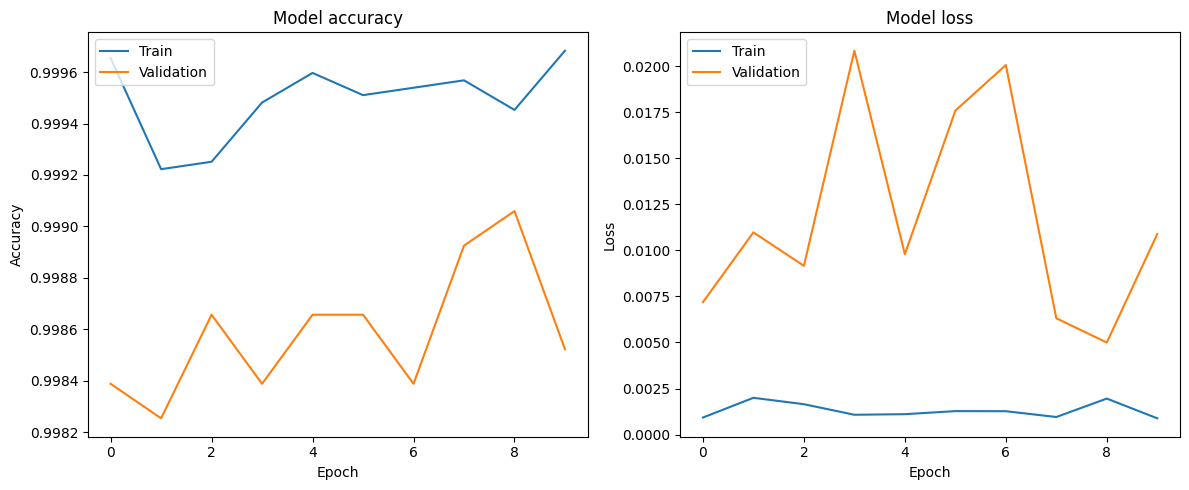

In [ ]:
import matplotlib.pyplot as plt

history = lstm_model.fit(x_train_reshaped, y_train, validation_data=(x_val_reshaped, y_val), epochs=10, callbacks=[checkpoint])

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, SimpleRNN, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define SimpleRNN Model Architecture
rnn_model = Sequential()
rnn_model.add(InputLayer(input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
rnn_model.add(SimpleRNN(units=100, activation='relu')) # SimpleRNN layer with 100 units
rnn_model.add(BatchNormalization()) # Batch Normalization layer
rnn_model.add(Dense(units=1, activation='sigmoid')) # Output layer for binary classification

# Print model summary
rnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        13,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,601 (53.13 KB)

 Trainable params: 13,401 (52.35 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
checkpoint_rnn = ModelCheckpoint('rnn_model.keras', save_best_only=True, monitor='val_loss')
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = rnn_model.fit(x_train_reshaped, y_train, validation_data=(x_val_reshaped, y_val), epochs=10, callbacks=[checkpoint_rnn])

Epoch 1/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9355 - loss: 0.2022 - val_accuracy: 0.9984 - val_loss: 0.0150
Epoch 2/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9987 - loss: 0.0050 - val_accuracy: 0.9979 - val_loss: 0.0246
Epoch 3/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9984 - val_loss: 0.0170
Epoch 4/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9991 - loss: 0.0026 - val_accuracy: 0.9987 - val_loss: 0.0167
Epoch 5/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9987 - val_loss: 0.0163
Epoch 6/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9990 - loss: 0.0028 - val_accuracy: 0.9985 - val_loss: 0.0089
Epoch 7/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9991 - loss: 0.0022 - val_accuracy: 0.9987 - val_loss: 0.0106
Epoch 8/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9995 - loss: 0.0014 - 

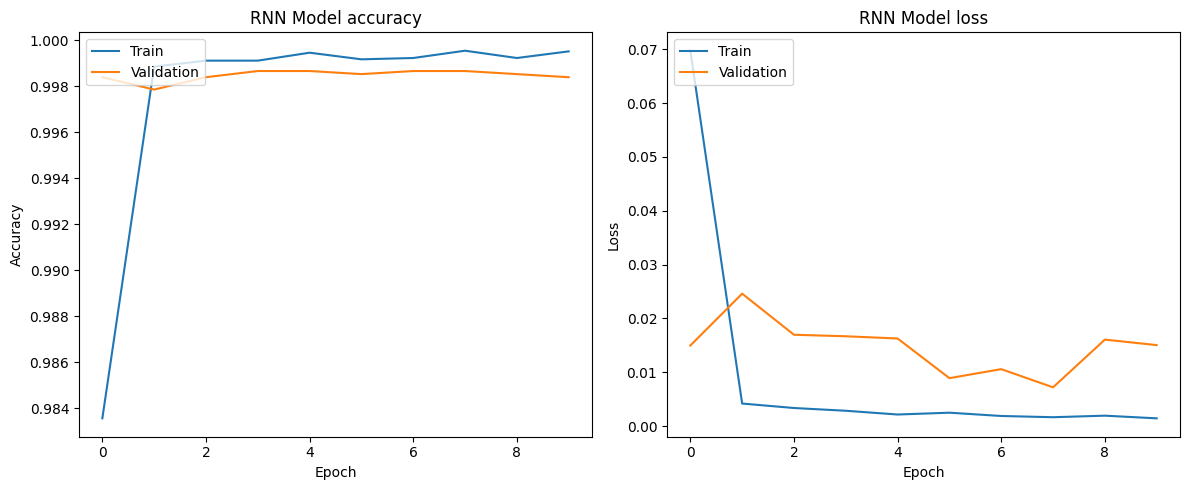

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming neural_net_predictions function is defined from previous steps
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)

print(classification_report(y_val, neural_net_predictions(rnn_model, x_val_reshaped), target_names=['Not Fraud', 'Fraud']))

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      7422
       Fraud       0.64      0.90      0.75        20

    accuracy                           1.00      7442
   macro avg       0.82      0.95      0.87      7442
weighted avg       1.00      1.00      1.00      7442



Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating Gradient Boosting Classifier...
Evaluating LinearSVC...
Evaluating Shallow Neural Network...
Evaluating LSTM Model...
Evaluating SimpleRNN Model...


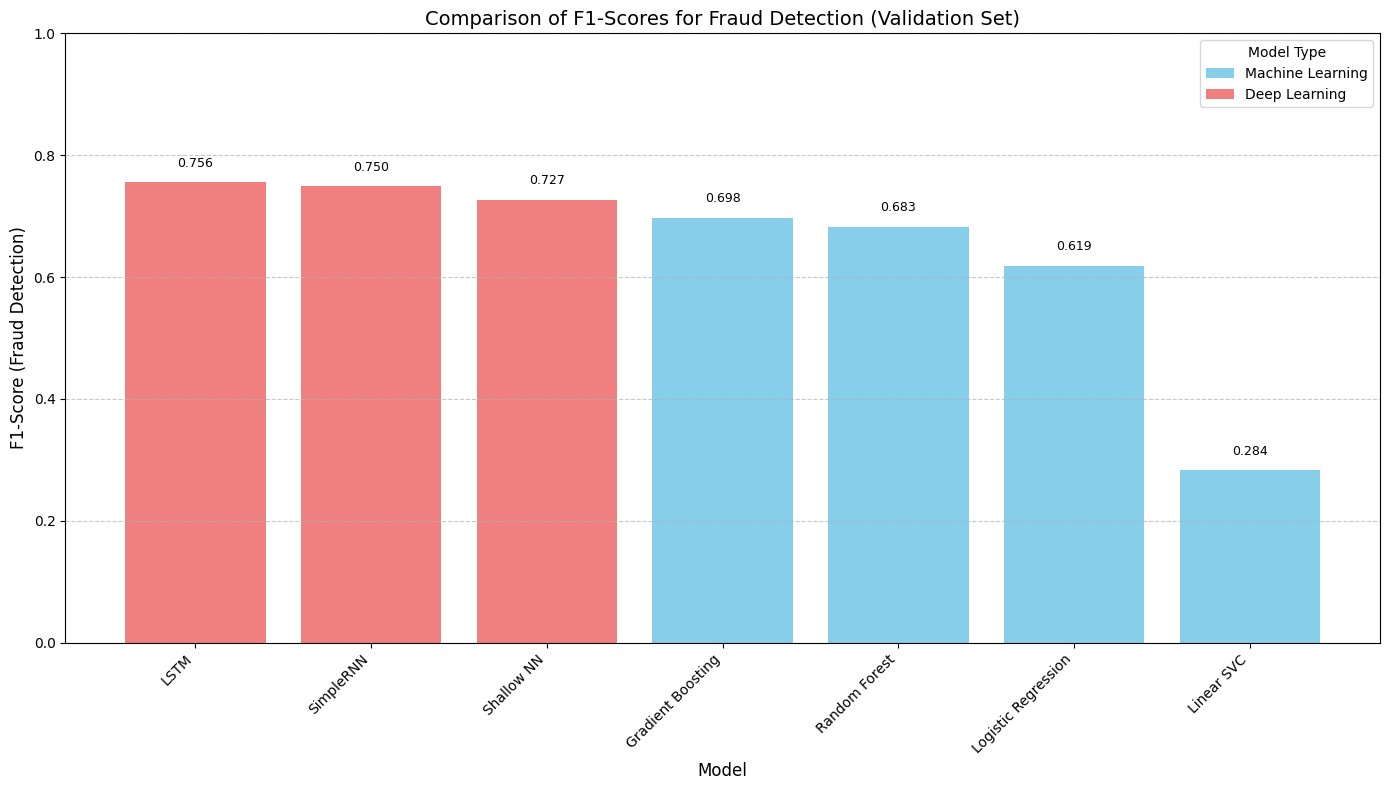

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, BatchNormalization, SimpleRNN

# Function to get predictions from Keras models
def neural_net_predictions(model, x):
  """
  Generates binary predictions from a Keras model's output.
  """
  # Suppress prediction output for cleaner report
  return (model.predict(x, verbose=0).flatten() > 0.5).astype(int)

# Dictionary to store F1-scores for the 'Fraud' class
f1_scores_fraud = {}

# Ensure models are defined and fitted
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Random Forest
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)

# Linear SVC
svc = LinearSVC(class_weight='balanced', max_iter=2000) # Increased max_iter for convergence if needed
svc.fit(x_train, y_train)


print("Evaluating Logistic Regression...")
lr_preds = logistic_model.predict(x_val)
lr_report = classification_report(y_val, lr_preds, target_names=['Not Fraud', 'Fraud'], output_dict=True)
f1_scores_fraud['Logistic Regression'] = lr_report['Fraud']['f1-score']

print("Evaluating Random Forest...")
rf_preds = rf.predict(x_val)
rf_report = classification_report(y_val, rf_preds, target_names=['Not Fraud', 'Fraud'], output_dict=True)
f1_scores_fraud['Random Forest'] = rf_report['Fraud']['f1-score']

print("Evaluating Gradient Boosting Classifier...")
gbc_preds = gbc.predict(x_val)
gbc_report = classification_report(y_val, gbc_preds, target_names=['Not Fraud', 'Fraud'], output_dict=True)
f1_scores_fraud['Gradient Boosting'] = gbc_report['Fraud']['f1-score']

print("Evaluating LinearSVC...")
svc_preds = svc.predict(x_val)
svc_report = classification_report(y_val, svc_preds, target_names=['Not Fraud', 'Fraud'], output_dict=True)
f1_scores_fraud['Linear SVC'] = svc_report['Fraud']['f1-score']

print("Evaluating Shallow Neural Network...")
shallow_nn_preds = neural_net_predictions(shallow_nn, x_val)
shallow_nn_report = classification_report(y_val, shallow_nn_preds, target_names=['Not Fraud', 'Fraud'], output_dict=True)
f1_scores_fraud['Shallow NN'] = shallow_nn_report['Fraud']['f1-score']

print("Evaluating LSTM Model...")
lstm_preds = neural_net_predictions(lstm_model, x_val_reshaped)
lstm_report = classification_report(y_val, lstm_preds, target_names=['Not Fraud', 'Fraud'], output_dict=True)
f1_scores_fraud['LSTM'] = lstm_report['Fraud']['f1-score']

print("Evaluating SimpleRNN Model...")
rnn_preds = neural_net_predictions(rnn_model, x_val_reshaped)
rnn_report = classification_report(y_val, rnn_preds, target_names=['Not Fraud', 'Fraud'], output_dict=True)
f1_scores_fraud['SimpleRNN'] = rnn_report['Fraud']['f1-score']


# Convert to DataFrame for plotting
df_performance = pd.DataFrame(f1_scores_fraud.items(), columns=['Model', 'F1-Score (Fraud)'])
df_performance['Model Type'] = df_performance['Model'].apply(lambda x: 'Deep Learning' if x in ['Shallow NN', 'LSTM', 'SimpleRNN'] else 'Machine Learning')

# Sort by F1-score for better visualization
df_performance = df_performance.sort_values(by='F1-Score (Fraud)', ascending=False)

# Plotting a comparative bar chart
plt.figure(figsize=(14, 8))
colors = ['skyblue' if mt == 'Machine Learning' else 'lightcoral' for mt in df_performance['Model Type']]
plt.bar(df_performance['Model'], df_performance['F1-Score (Fraud)'], color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1-Score (Fraud Detection)', fontsize=12)
plt.title('Comparison of F1-Scores for Fraud Detection (Validation Set)', fontsize=14)
plt.ylim(0, 1) # F1-score ranges from 0 to 1
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add F1-score values on top of bars
for index, value in enumerate(df_performance['F1-Score (Fraud)']):
    plt.text(index, value + 0.02, f'{value:.3f}', ha='center', va='bottom', fontsize=9)

# Add a legend for model types
ml_patch = plt.Rectangle((0, 0), 1, 1, fc='skyblue', label='Machine Learning')
dl_patch = plt.Rectangle((0, 0), 1, 1, fc='lightcoral', label='Deep Learning')
plt.legend(handles=[ml_patch, dl_patch], title="Model Type", loc='upper right')

plt.tight_layout()
plt.show()